In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split


import tensorflow as tf

import cv2
import os
import pandas as pd
import numpy as np

In [56]:
labels= ['vehicles', 'non-vehicles'] #vehicles-0, non-vehicles-1
img_size = 64
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path,img))
                resized_arr=cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr,class_num])
            except Exception as e:
                print(e)
    return np.array(data)           

In [57]:
data = get_data('../input/vehicle-detection-image-set/data')

KeyboardInterrupt: 

In [ ]:
df = pd.DataFrame(data, columns = ['images', 'labels'])

In [ ]:
df.head()

In [ ]:
df['images'][1].shape

In [70]:
X_train,X_test,y_train,y_test = train_test_split(df['images'], df['labels'], test_size = 0.2, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [71]:
df['labels'].value_counts()

1    8968
0    8792
Name: labels, dtype: int64

Text(0.5, 1.0, 'vehicles')

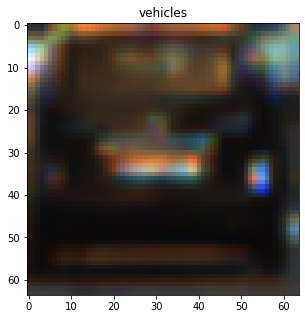

In [72]:
plt.figure(figsize = (5,5))
plt.imshow(data[1][0])
plt.title(labels[data[0][1]])

In [73]:
df.head()

,images,labels
0,"[[[132, 134, 121], [207, 211, 195], [203, 210,...",0
1,"[[[43, 44, 46], [42, 44, 46], [38, 46, 48], [3...",0
2,"[[[45, 49, 62], [59, 52, 65], [45, 46, 66], [4...",0
3,"[[[83, 92, 73], [188, 106, 65], [205, 133, 81]...",0
4,"[[[22, 22, 25], [22, 20, 19], [21, 19, 15], [2...",0


In [74]:
print('train_df_length: ', len(X_train), 'test_df_length ', len(X_test), '  valid_df length: ', len(X_val))

train_df_length:  11366 test_df_length  3552   valid_df length:  2842


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='labels', ylabel='count'>

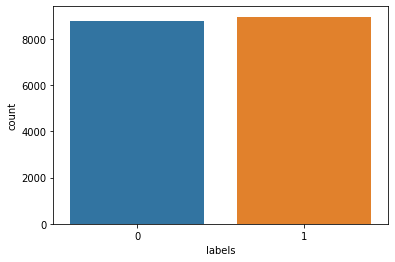

In [75]:
import seaborn as sns
sns.countplot(df['labels']) #vehicles-0, non-vehicles-1

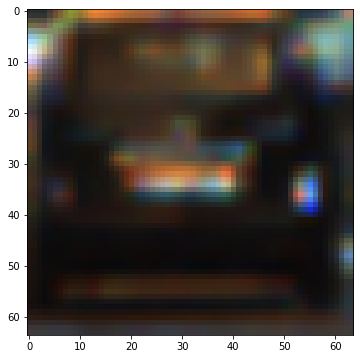

In [76]:
plt.figure(figsize=(6,6))
plt.imshow(data[1][0])

In [77]:
def change_image_dimension(data):
    data=np.reshape(data.to_list(),(len(data),img_size,img_size,3))
    return data

In [78]:
X_train=change_image_dimension(X_train)
X_val=change_image_dimension(X_val)
X_test=change_image_dimension(X_test)
X_train=X_train/255.0
X_val=X_val/255.0
X_test=X_test/255.0
X_label=np.array(y_train,dtype=int)
val_label=np.array(y_val,dtype=int)
y_test=np.array(y_test,dtype=int)

In [94]:
X_label

array([1, 1, 1, ..., 1, 0, 1])

In [ ]:
#Data Augmentation

In [79]:
datagen = ImageDataGenerator(shear_range = 0.2,
zoom_range = 0.2,rotation_range=30, brightness_range=[0.5, 1.5],width_shift_range=0.1, height_shift_range=0.1,
horizontal_flip = True)

datagen.fit(X_train)

In [ ]:
#Model

In [87]:
model = Sequential()
model.add(Conv2D(32, (3,3),activation = "relu", input_shape = (64,64,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64, (3,3), activation = "relu"))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128, (3,3),  activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()          

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 128)        

In [88]:
opt= Adam(lr = 0.0001)
model.compile(optimizer = opt, loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics= ['accuracy'] )

In [89]:
history = model.fit(X_train,X_label,epochs = 15,batch_size=32,validation_data = (X_val, val_label))

Epoch 1/15
356/356 [==============================] - 3s 6ms/step - loss: 0.4069 - accuracy: 0.8052 - val_loss: 0.1737 - val_accuracy: 0.9363
Epoch 2/15
356/356 [==============================] - 2s 6ms/step - loss: 0.1349 - accuracy: 0.9548 - val_loss: 0.0975 - val_accuracy: 0.9680
Epoch 3/15
356/356 [==============================] - 2s 5ms/step - loss: 0.0957 - accuracy: 0.9689 - val_loss: 0.0872 - val_accuracy: 0.9694
Epoch 4/15
356/356 [==============================] - 2s 5ms/step - loss: 0.0669 - accuracy: 0.9794 - val_loss: 0.0757 - val_accuracy: 0.9729
Epoch 5/15
356/356 [==============================] - 2s 5ms/step - loss: 0.0564 - accuracy: 0.9805 - val_loss: 0.0609 - val_accuracy: 0.9803
Epoch 6/15
356/356 [==============================] - 2s 5ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0472 - val_accuracy: 0.9856
Epoch 7/15
356/356 [==============================] - 2s 5ms/step - loss: 0.0491 - accuracy: 0.9823 - val_loss: 0.0420 - val_accuracy: 0.9877
Epoch 

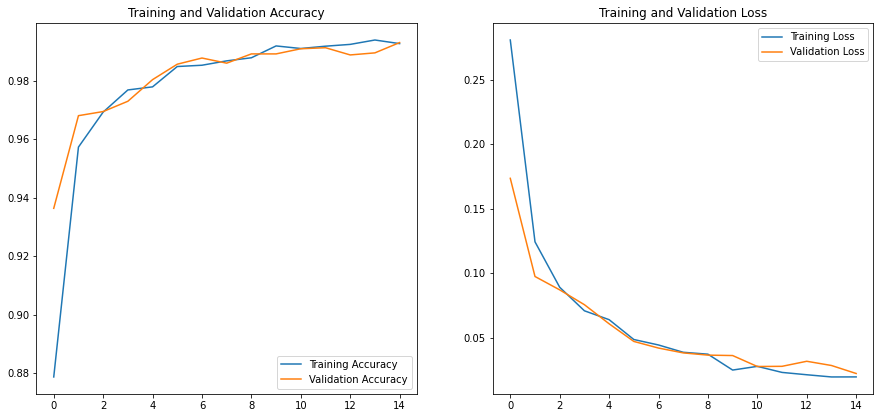

In [90]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [93]:
 #Evaluating model on validation data
evaluate = model.evaluate(X_val,val_label)
print(evaluate)

89/89 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9930
[0.022320525720715523, 0.9929627180099487]


In [119]:
# Testing predictions and the actual label
checkImage = X_train[0:1]
checklabel = X_label[0:1]

predict = model.predict(np.array(checkImage))

output = { 0:'vehicles', 1: 'non-vehicles'}

print("Actual :- ",checklabel)
print("Predicted :- ",output[np.argmax(predict)])

Actual :-  [1]
Predicted :-  non-vehicles
